In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import solver, cdt
import argparse
import numpy as np

# load cifar10 data

In [2]:
train_dataset = datasets.CIFAR10(root='./cifar10/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.CIFAR10(root='./cifar10/', train=False, transform=transforms.ToTensor(), download=True)

Files already downloaded and verified
Files already downloaded and verified


# data preprocessing

In [3]:
batch_size = 100
train_set, val_set = torch.utils.data.random_split(train_dataset, [40000, 10000])  # CIFAR10
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Training settings

In [4]:
parser = argparse.ArgumentParser(description='PyTorch Convolution Decision Tree Example(CIFAR10)')
parser.add_argument('--batch-size', type=int, default=100, metavar='N',
                    help='input batch size for training (default: 100)')
parser.add_argument('--input-nc', type=int, default=3, metavar='N',
                    help='input number of channel(default: 3)')
parser.add_argument('--input-dim', type=int, default=32*32, metavar='N',
                    help='input dimension size(default: 32*32)')
parser.add_argument('--input-height', type=int, default=32, metavar='N',
                    help='input height size(default: 32)')
parser.add_argument('--output-dim', type=int, default=10, metavar='N',
                    help='output dimension size(default: 10)')
parser.add_argument('--max-depth', type=int, default=3, metavar='N',
                    help='maximum depth of tree(default: 3)')
parser.add_argument('--lmbda', type=float, default=0.01, metavar='LR',
                    help='temperature rate (default: 0.01)')
parser.add_argument('--n-tree', type=int, default=3, metavar='N',
                    help='number of trees for CDForest(default: 3)')
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='disables CUDA training')

parser.add_argument('--max-epoch', type=int, default=100, metavar='N',
                    help='number of epochs to train (default: 100)')
parser.add_argument('--disp-freq', type=int, default=100, metavar='N',
                    help='display frequency')
parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                    help='learning rate (default: 0.01)')
parser.add_argument('--seed', type=int, default=0, metavar='S',
                    help='random seed (default: 0)')

parser.add_argument('-f') # dont know why, but useful
args = parser.parse_args()

args.cuda = not args.no_cuda and torch.cuda.is_available()
torch.manual_seed(args.seed)
np.random.seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)


# modeling and optimizer

In [5]:
model = cdt.CDTree(args)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()
if args.cuda:
    model.cuda()
    print('RUNNING WITH GPU')
else:
    model.cpu()
    print("WARNING: RUNNING WITHOUT GPU")

RUNNING WITH GPU


# Training

In [6]:
args.disp_freq = 400
model, train_loss, train_acc = solver.train_val(model, optimizer, criterion, train_loader, val_loader,
                                                    args.max_epoch, args.disp_freq, args.cuda, True)

/home/ma-user/anaconda3/envs/Pytorch-1.0.0/lib/python3.6/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [1][100]	 Batch [400][400]	 Training Loss 0.5320	 Accuracy 0.5700

Epoch [1]	 Average training loss 0.7161	 Average training accuracy 0.5011
Epoch [1]	 Average validation loss 0.6489	 Average validation accuracy 0.5690

Epoch [2][100]	 Batch [400][400]	 Training Loss 0.5365	 Accuracy 0.6100

Epoch [2]	 Average training loss 0.5313	 Average training accuracy 0.6402
Epoch [2]	 Average validation loss 0.6023	 Average validation accuracy 0.6095

Epoch [3][100]	 Batch [400][400]	 Training Loss 0.3887	 Accuracy 0.7800

Epoch [3]	 Average training loss 0.4488	 Average training accuracy 0.7026
Epoch [3]	 Average validation loss 0.5411	 Average validation accuracy 0.6537

Epoch [4][100]	 Batch [400][400]	 Training Loss 0.3240	 Accuracy 0.8300

Epoch [4]	 Average training loss 0.4006	 Average training accuracy 0.7373
Epoch [4]	 Average validation loss 0.5044	 Average validation accuracy 0.6697

Epoch [5][100]	 Batch [400][400]	 Training Loss 0.3108	 Accuracy 0.7800

Epoch [5]	 Average trai

Epoch [37][100]	 Batch [400][400]	 Training Loss 0.2401	 Accuracy 0.8600

Epoch [37]	 Average training loss 0.1194	 Average training accuracy 0.9349
Epoch [37]	 Average validation loss 0.6233	 Average validation accuracy 0.7174

Epoch [38][100]	 Batch [400][400]	 Training Loss 0.1529	 Accuracy 0.8900

Epoch [38]	 Average training loss 0.1229	 Average training accuracy 0.9313
Epoch [38]	 Average validation loss 0.6921	 Average validation accuracy 0.7139

Epoch [39][100]	 Batch [400][400]	 Training Loss 0.1630	 Accuracy 0.9000

Epoch [39]	 Average training loss 0.1176	 Average training accuracy 0.9346
Epoch [39]	 Average validation loss 0.6033	 Average validation accuracy 0.7264

Epoch [40][100]	 Batch [400][400]	 Training Loss 0.1109	 Accuracy 0.9500

Epoch [40]	 Average training loss 0.1218	 Average training accuracy 0.9320
Epoch [40]	 Average validation loss 0.7551	 Average validation accuracy 0.6841

Epoch [41][100]	 Batch [400][400]	 Training Loss 0.0987	 Accuracy 0.9500

Epoch [41]

Epoch [73][100]	 Batch [400][400]	 Training Loss 0.1220	 Accuracy 0.9300

Epoch [73]	 Average training loss 0.1144	 Average training accuracy 0.9375
Epoch [73]	 Average validation loss 0.6386	 Average validation accuracy 0.7260

Epoch [74][100]	 Batch [400][400]	 Training Loss 0.0938	 Accuracy 0.9500

Epoch [74]	 Average training loss 0.1024	 Average training accuracy 0.9473
Epoch [74]	 Average validation loss 0.6690	 Average validation accuracy 0.7117

Epoch [75][100]	 Batch [400][400]	 Training Loss 0.1550	 Accuracy 0.9100

Epoch [75]	 Average training loss 0.1025	 Average training accuracy 0.9468
Epoch [75]	 Average validation loss 0.6611	 Average validation accuracy 0.7229

Epoch [76][100]	 Batch [400][400]	 Training Loss 0.1096	 Accuracy 0.9500

Epoch [76]	 Average training loss 0.1067	 Average training accuracy 0.9426
Epoch [76]	 Average validation loss 0.7533	 Average validation accuracy 0.7028

Epoch [77][100]	 Batch [400][400]	 Training Loss 0.1026	 Accuracy 0.9300

Epoch [77]

# Test and plot

Testing...


/home/ma-user/anaconda3/envs/Pytorch-1.0.0/lib/python3.6/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


The test accuracy is 0.7367.



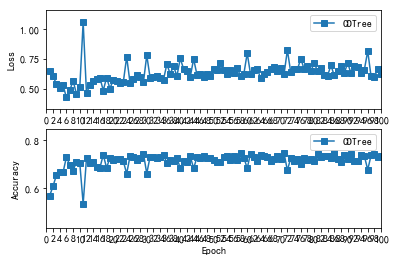

In [7]:
test_acc = solver.test_model(model, criterion, test_loader, args.cuda)
solver.plot_loss_and_acc({'CDTree': [train_loss, train_acc]})